In [ ]:
!pip install tensorflow numpy matplotlib scikit-learn keras

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 61s 160ms/step - loss: 0.5760 - accuracy: 0.7949 - val_loss: 0.4161 - val_accuracy: 0.8474
Epoch 2/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3747 - accuracy: 0.8674 - val_loss: 0.3598 - val_accuracy: 0.8721
Epoch 3/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3245 - accuracy: 0.8832 - val_loss: 0.3155 - val_accuracy: 0.8876
Epoch 4/10
375/375 [==============================] - 40s 106ms/step - loss: 0.2949 - accuracy: 0.8935 - val_loss: 0.2870 - val_accuracy: 0.8968
Epoch 5/10
375/375 [==============================] - 38s 101ms/step - loss: 0.2666 - accuracy: 0.9035 - val_loss: 0.2826 - val_accuracy: 0.8992
Epoch 6/10
375/375 [==============================] - 38s 101ms/step - loss: 0.2496 - accuracy: 0.9101 - val_loss: 0.2777 - val_accuracy: 0.9008
Epoch 7/10
375/375 [==============================] - 38s 100ms/ste

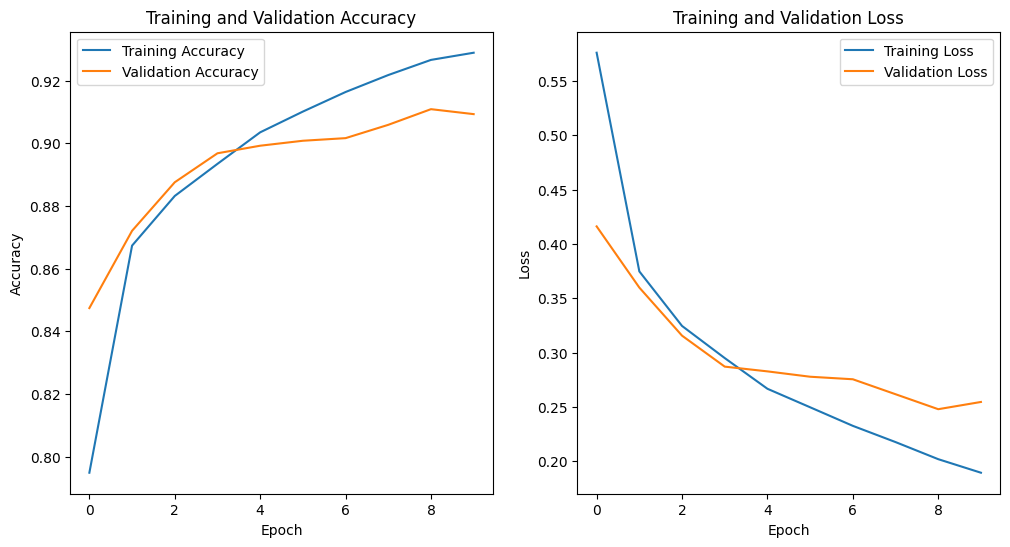

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Завантаження даних
(x_train, y_train), (dnn_x_test, dnn_y_test) = fashion_mnist.load_data()

# Перетворення даних
x_train = tf.cast(x_train[..., tf.newaxis], tf.float32) / 255.0
dnn_x_test = tf.cast(dnn_x_test[..., tf.newaxis], tf.float32) / 255.0

# Визначення архітектури моделі
model_dnn = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_dnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Навчання
history = model_dnn.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

# Оцінка
dnn_test_loss, dnn_test_acc = model_dnn.evaluate(dnn_x_test, dnn_y_test)
print(f'Test accuracy: {dnn_test_acc}')

# Візуалізація кривих навчання
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Epoch 1/30
375/375 [==============================] - 16s 41ms/step - loss: 0.6472 - accuracy: 0.7663 - val_loss: 0.4106 - val_accuracy: 0.8491
Epoch 2/30
375/375 [==============================] - 17s 44ms/step - loss: 0.4611 - accuracy: 0.8357 - val_loss: 0.3982 - val_accuracy: 0.8564
Epoch 3/30
375/375 [==============================] - 15s 40ms/step - loss: 0.4181 - accuracy: 0.8463 - val_loss: 0.3757 - val_accuracy: 0.8635
Epoch 4/30
375/375 [==============================] - 15s 40ms/step - loss: 0.3995 - accuracy: 0.8566 - val_loss: 0.3568 - val_accuracy: 0.8700
Epoch 5/30
375/375 [==============================] - 15s 40ms/step - loss: 0.3778 - accuracy: 0.8628 - val_loss: 0.3542 - val_accuracy: 0.8727
Epoch 6/30
375/375 [==============================] - 15s 41ms/step - loss: 0.3658 - accuracy: 0.8658 - val_loss: 0.3357 - val_accuracy: 0.8805
Epoch 7/30
375/375 [==============================] - 17s 45ms/step - loss: 0.3507 - accuracy: 0.8711 - val_loss: 0.3266 - val_accuracy:

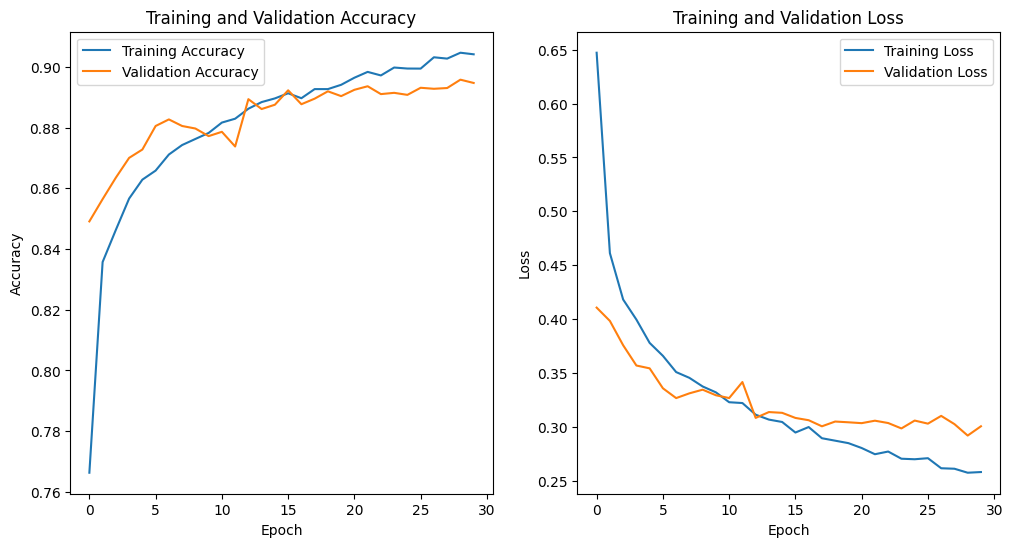

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Завантаження даних
(x_train, y_train), (vgg16_x_test, vgg16_y_test) = fashion_mnist.load_data()

# Перетворення даних
x_train = x_train.astype("float32") / 255.0
vgg16_x_test = vgg16_x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
vgg16_y_test = keras.utils.to_categorical(vgg16_y_test, 10)

# Визначення архітектури моделі
model_vgg16 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

model_vgg16.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Навчання
history = model_vgg16.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, verbose=1)

# Оцінка
vgg16_test_loss, vgg16_test_acc = model_vgg16.evaluate(vgg16_x_test, vgg16_y_test)
print(f"Test accuracy (Dense layers): {vgg16_test_acc}")

# Візуалізація кривих навчання
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [4]:
# Точність моделі з використанням VGG16
vgg16_test_loss, vgg16_test_acc = model_vgg16.evaluate(vgg16_x_test, vgg16_y_test, verbose=0)

# Отримання точності багатошарової моделі
dnn_test_loss, dnn_test_acc = model_dnn.evaluate(dnn_x_test, dnn_y_test, verbose=0)

# Р-ти порівняння
print("Точність моделі з використанням VGG16 на тестових даних:", vgg16_test_acc)
print("Точність багатошарової моделі на тестових даних:", dnn_test_acc)

if vgg16_test_acc > dnn_test_acc:
    print("Модель з використанням VGG16 показала лучший результат.")
elif vgg16_test_acc < dnn_test_acc:
    print("Багатошарова модель показала кращий результат.")
else:
    print("Точність моделей співпадає.")

Точність моделі з використанням VGG16 на тестових даних: 0.8907999992370605
Точність багатошарової моделі на тестових даних: 0.9017000198364258
Багатошарова модель показала кращий результат.
